In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples=2000
n_features=1000
n_components=10
n_top_words=20

In [2]:
def plot_top_words(model,feature_names,n_top_words, title):
    fig,axes=plt.subplots(2,5,figsize=(30,15), sharex=True)
    axes=axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind=topic.argsort()[:-n_top_words -1 :-1]
        top_features=[feature_names[i] for i in top_features_ind]
        weights=topic[top_features_ind]
        
        ax=axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.9,bottom=0.05, wspace=0.9, hspace=0.3)
    plt.show()

In [4]:
file=open('Data/series_names.txt')
content=file.read()

In [5]:
content = content.splitlines()
data_samples= [c for c in content]

In [6]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 0.609s.


In [7]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

done in 0.602s.



In [8]:
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 7.332s.


/home/samar/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


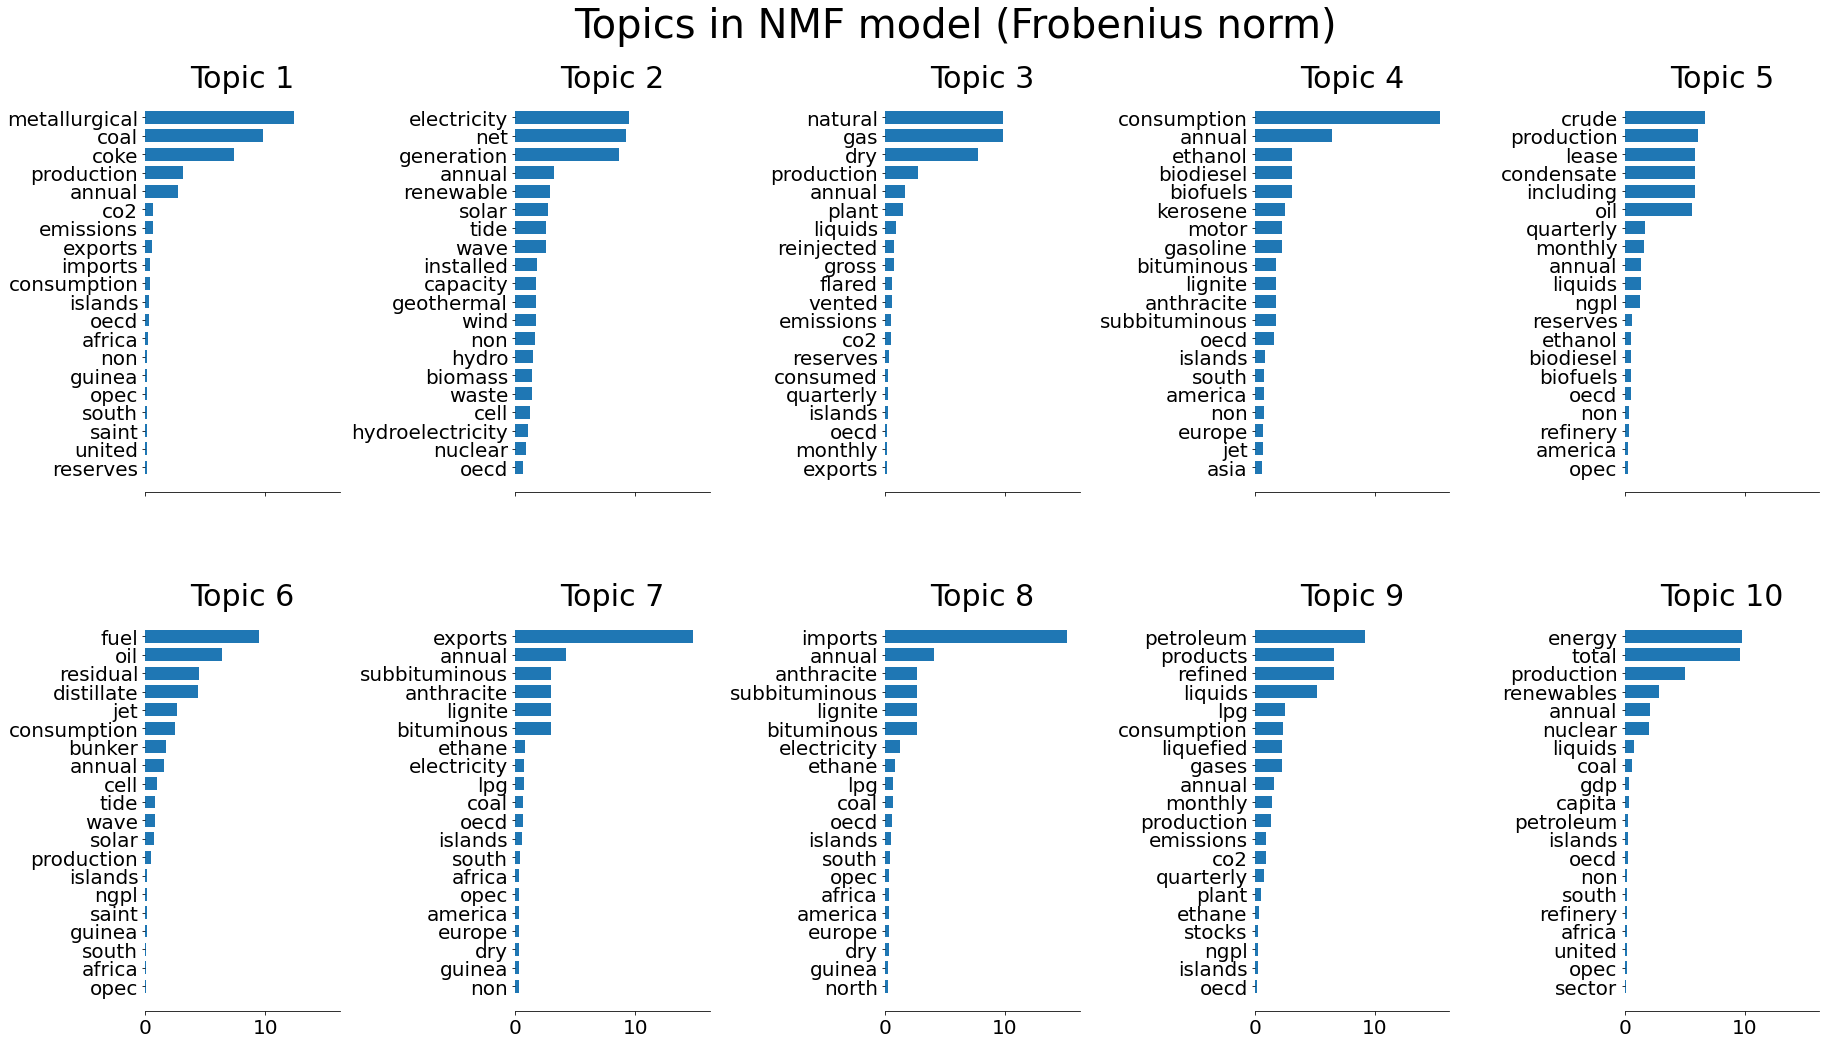

In [9]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


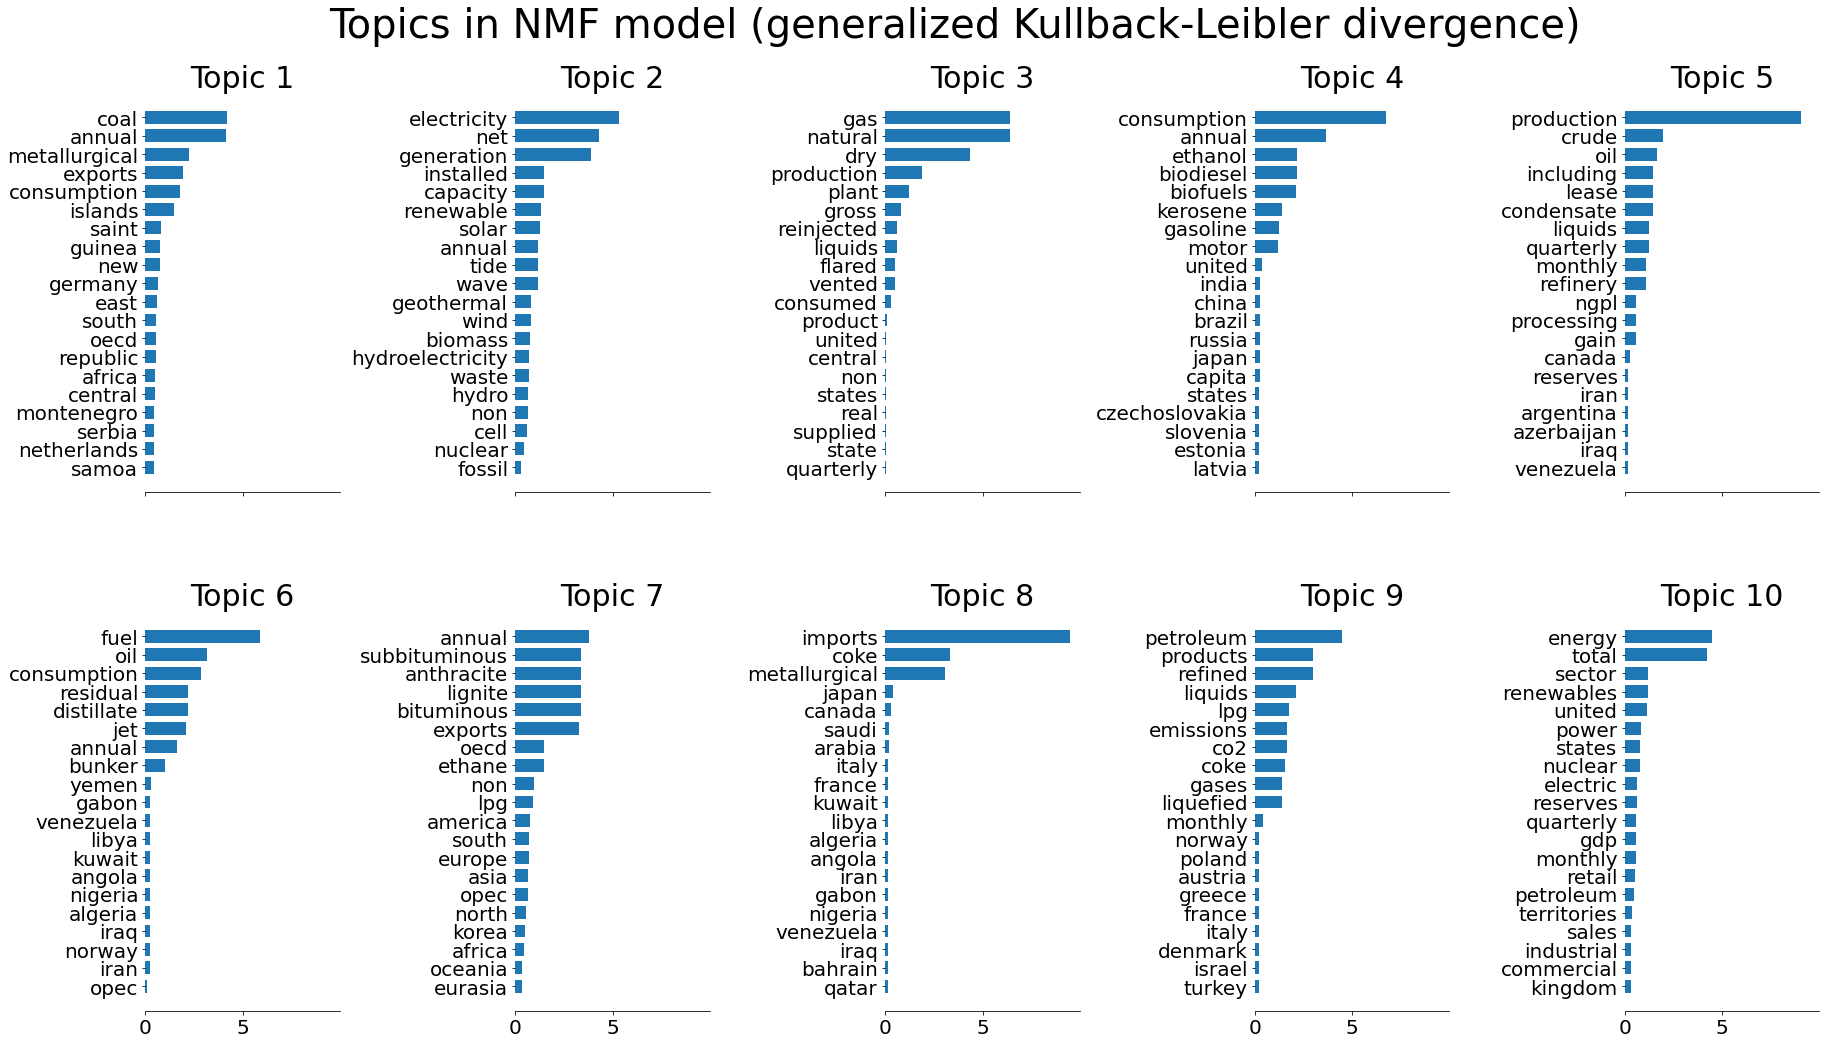

In [10]:
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0=time()
nmf=NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu',
       max_iter=1000, alpha=.1, l1_ratio=.5).fit(tfidf)
tfidf_feature_names=tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Topics in NMF model (generalized Kullback-Leibler divergence)')

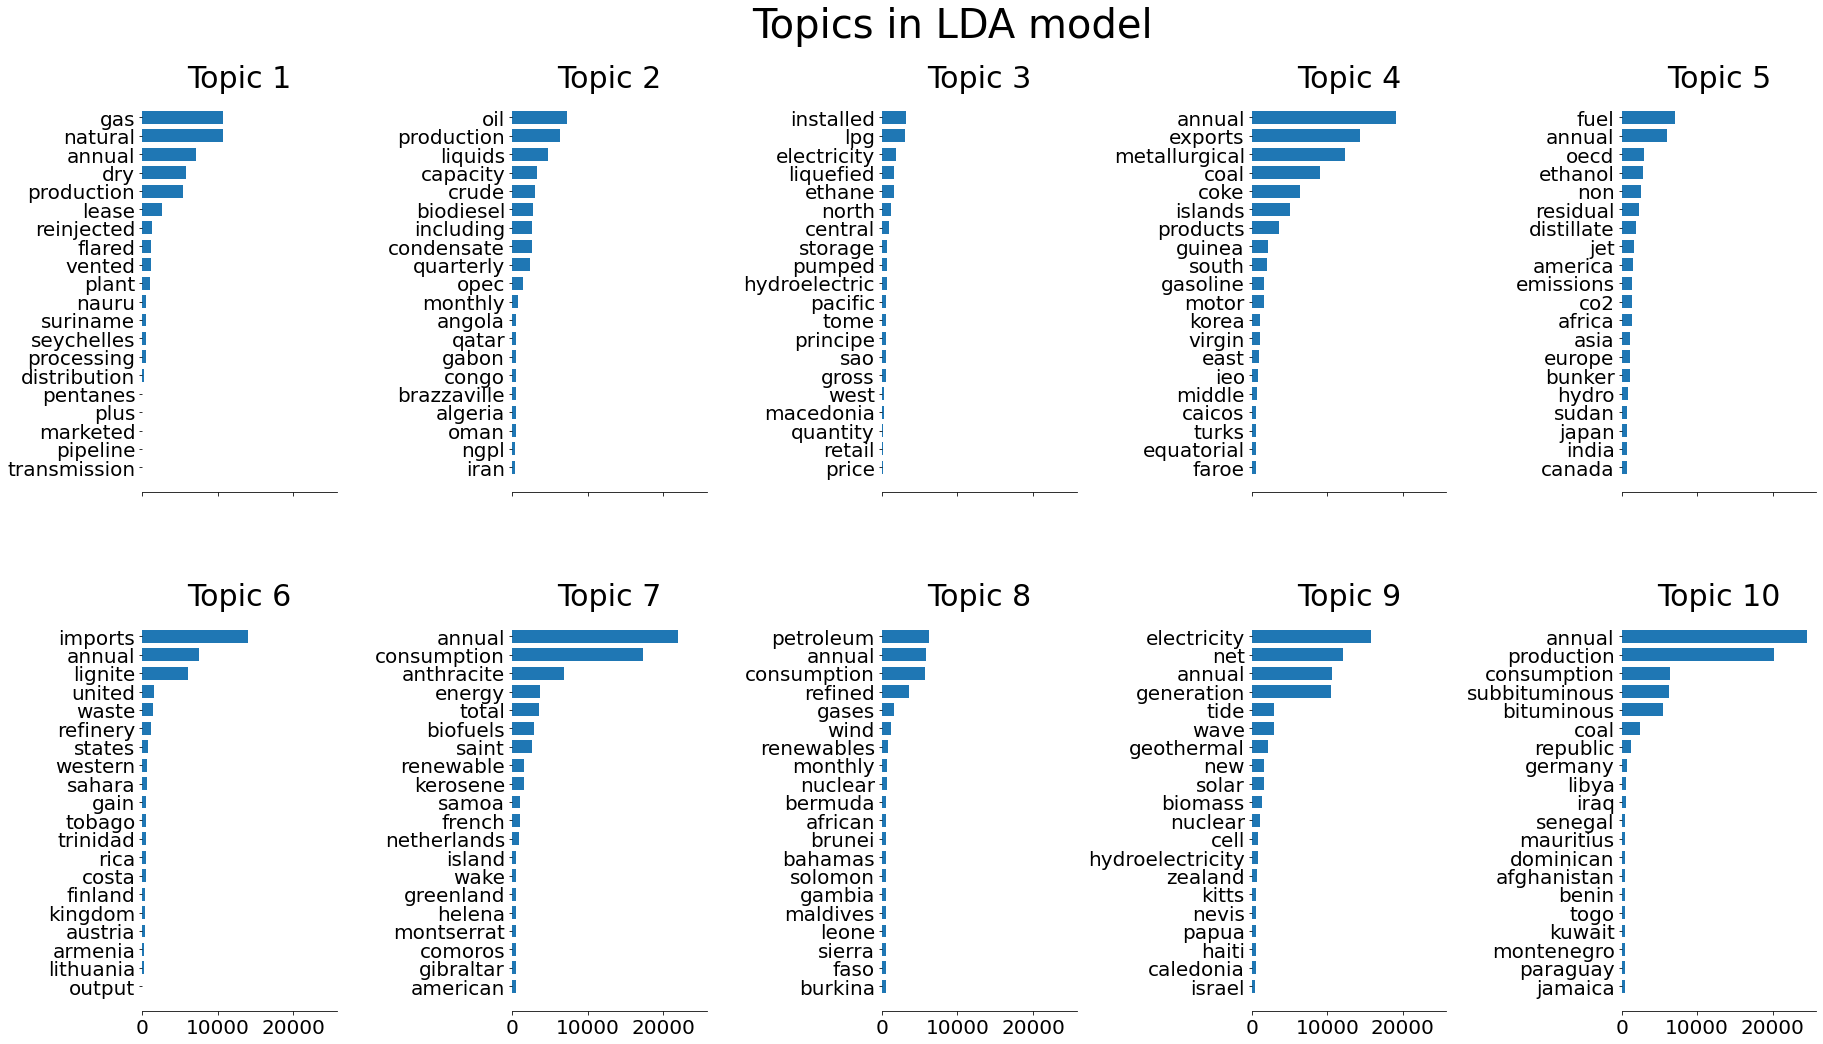

In [11]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online',
                               learning_offset=50., random_state=0)
t0=time()
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [12]:
import pickle
with open('Topic_Extraction_LDA.pickle','wb') as f:
    pickle.dump(lda,f)

In [13]:
with open('Topic_Extraction_NMF2.pickle','wb') as f:
    pickle.dump(nmf,f)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


/home/samar/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


done in 6.950s.


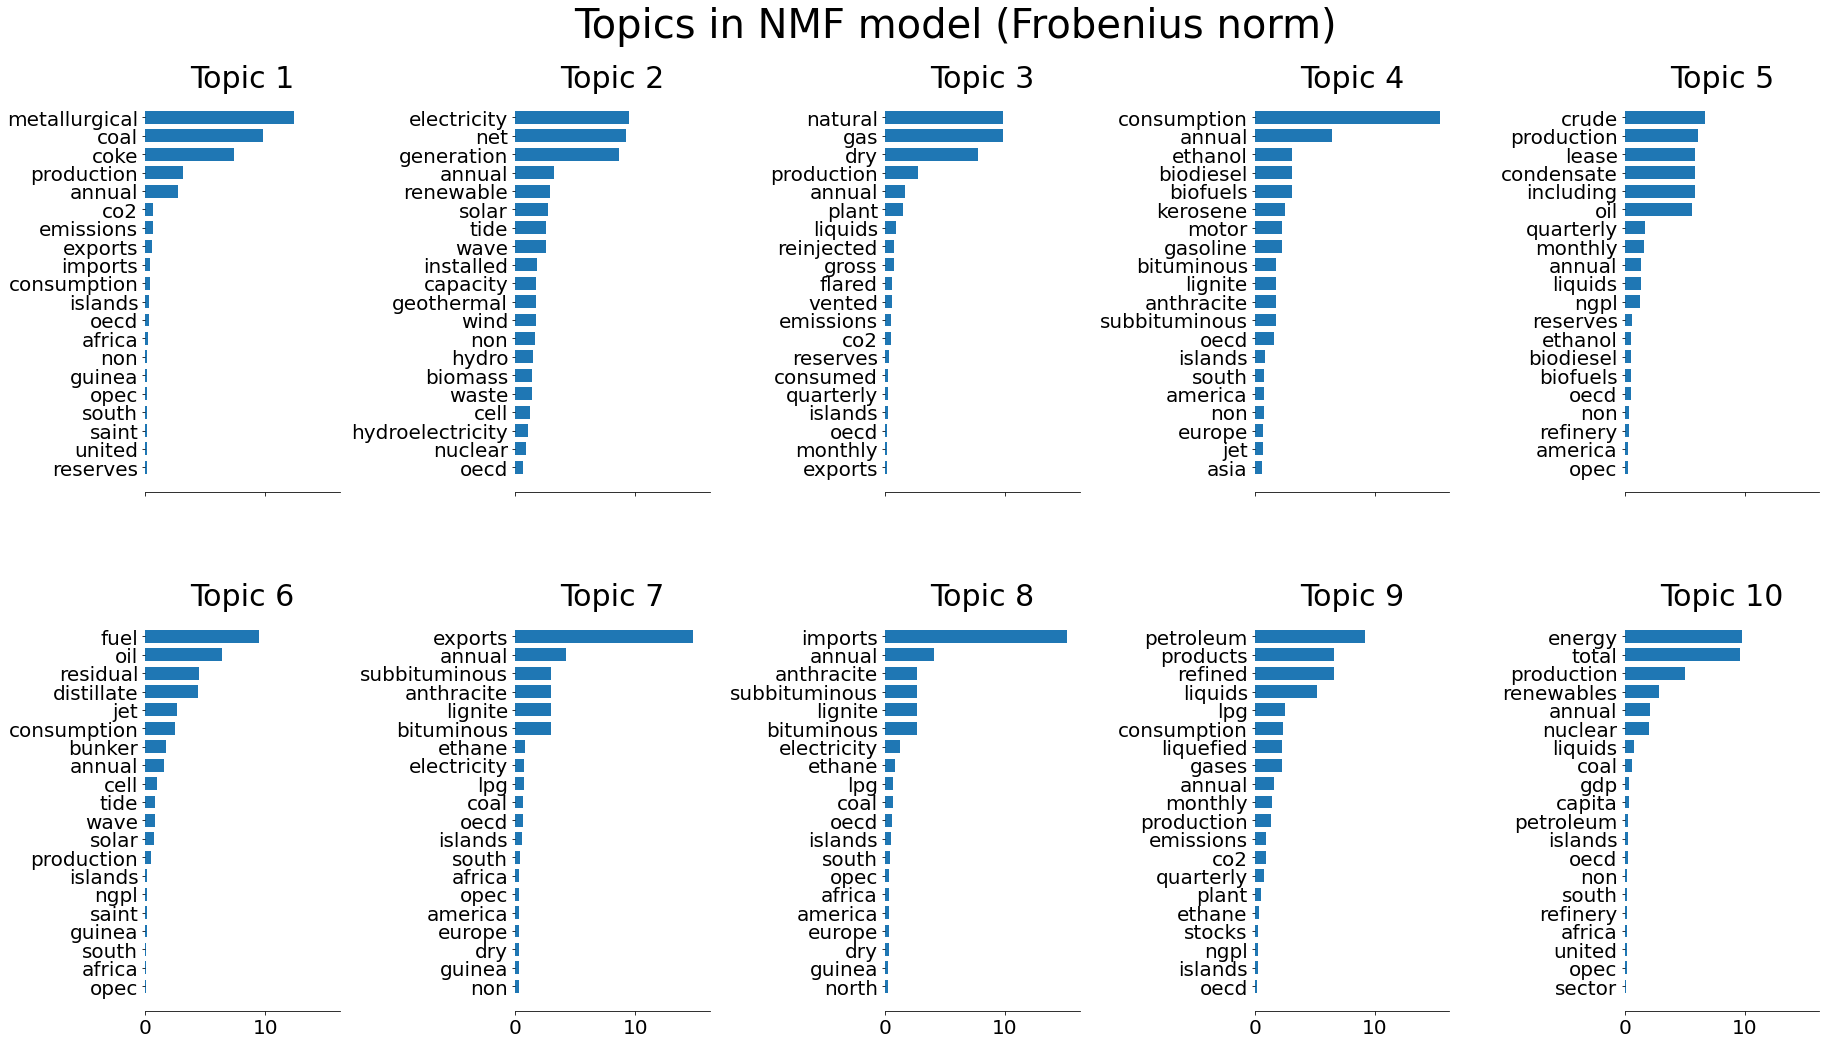

In [15]:
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')



In [16]:
with open('Topic_Extraction_NMF_Frobenius_Norm.pickle','wb') as f:
    pickle.dump(nmf,f)